# Введение в TensorFlow
В этом блокноте мы обучим модель простейшей линейной регрессии, используя «чистый» низкоуровневый TensorFlow и встроенный autograd.

Сначала, как обычно, подключим необходимые для дальнейшего библиотеки, в частности — библиотеку `tensorflow`.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Зададим количество объектов, размер батча для шага обучения, количество эпох обучения

In [2]:
n_samples, batch_size, ep_number = 1000, 100, 1000

Зафиксируем random seed для воспроизводимости эксперимента в дальнейшем

In [3]:
np.random.seed(2)

Сгенерируем набор данных по закону
$$
y = 2x + 1 + \varepsilon, \quad \varepsilon \sim \mathsf N_{0, 2}, \quad x \in \mathsf U_{1, 10}.
$$
Независимые переменные, то есть переменные $x$, детерминированы, но изначально сгенерированы случайным образом

In [4]:
X_data = np.random.uniform(1, 10, (n_samples, 1))
y_data = 2 * X_data + 1 + np.random.normal(0, 2, (n_samples, 1))

Визуализируем сгенерированный набор данных.

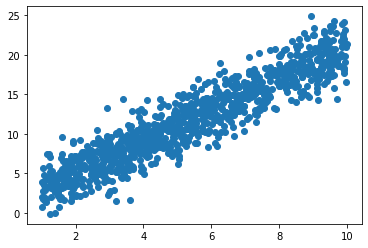

In [5]:
plt.scatter(X_data, y_data)

Будем искать модель, аппроксимирующую наши данные, в виде
$$
y = kx + b,
$$
где параметры $k$ и $b$ -- параметры, которые нам необходимо определить, основываясь на имеющихся данных

In [6]:
# создаем тензоры-переменные — хранилища для изменяемых в процессе обучения переменных, инициализируем их случайно выборкой из стандартного нормального закона
k = tf.Variable(tf.random.normal([1, 1], mean = 0, stddev = 1), name = 'slope')
b = tf.Variable(tf.random.normal([1, 1], mean = 0, stddev = 1), name = 'biases')
# создаем тензоры-константы на основе обучающей выборки
X_data = tf.constant(X_data, dtype = tf.float32)
y_data = tf.constant(y_data, dtype = tf.float32)

Metal device set to: Apple M1 Pro


2022-07-03 12:56:27.154224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-03 12:56:27.154407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Определим функцию для предсказания. Опять-таки, просто $y = kx + b$.

In [7]:
def y_pred(X):
  return tf.add(tf.matmul(X, k), b)

Определим функцию потерь: будем минимизировать сумму квадратов отклонений предсказаний от «правильных» ответов.

In [8]:
def loss():
  return tf.reduce_sum(tf.square(y_batch - y_pred(X_batch)))

Выберем оптимизатор, в нашем случае -- Адам, и зададим отдельно переменные, которые будем обучать -- менять при каждом новом шаге оптимизации.

In [9]:
optimizer = tf.optimizers.Adam(0.01)
trainable_vars = [k, b]

Теперь перейдем к обучению нашей модели. Разобьем набор данных на батчи и проведем обучение по заданному количеству эпох

In [10]:
display_step = 100
for ep in range(ep_number):
  for _ in range(0, int(n_samples / batch_size - 1)):
    X_batch = X_data[_ * batch_size : (_ + 1) * batch_size]
    y_batch = y_data[_ * batch_size : (_ + 1) * batch_size]
    optimizer.minimize(loss, trainable_vars)
  X_batch = X_data[(_ + 1) * batch_size : ]
  y_batch = y_data[(_ + 1) * batch_size : ]
  optimizer.minimize(loss, trainable_vars)
  if ((ep + 1) % display_step == 0):
    print('Epoch: ' + str(ep + 1) + ' k: ' + str(k) + ' b: ' + str(b))


Epoch: 100 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.8619027]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.8474811]], dtype=float32)>
Epoch: 200 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.9510007]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.275549]], dtype=float32)>
Epoch: 300 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.9768568]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.1079718]], dtype=float32)>
Epoch: 400 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.9791459]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.0911928]], dtype=float32)>
Epoch: 500 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.978995]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1

Мы видим, что обучение прошло весьма неплохо. Выведем результат.


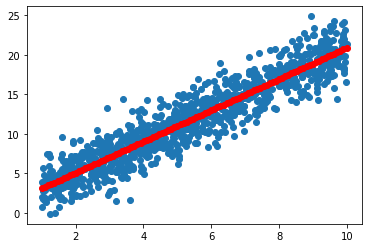

In [11]:
plt.scatter(X_data, y_data)
x = np.linspace(np.min(X_data), np.max(X_data), 100).reshape(1, -1)
y = x*k + b
plt.scatter(x, y, color = 'red')
